<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/3%20Dask/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science with Python and Dask
## Chapter 2 - Introducing Dask

### Section 2.1.1: Examining the Metadata of Dask Objects

In [ ]:
import numpy as np
import pandas as pd
import time

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/dataset/nyc

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/dataset/nyc


In [ ]:
# Listing 2.1
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt


df = pd.read_csv("Parking_Violations_Issued_-_Fiscal_Year_2017.csv")
df

,Unnamed: 0,Summons.Number,Plate.ID,Registration.State,Plate.Type,Issue.Date,Violation.Code,Vehicle.Body.Type,Vehicle.Make,Issuing.Agency,...,Vehicle.Color,Unregistered.Vehicle.,Vehicle.Year,Meter.Number,Feet.From.Curb,Violation.Post.Code,Violation.Description,No.Standing.or.Stopping.Violation,Hydrant.Violation,Double.Parking.Violation
0,4927376,8497566129,XCRY24,NJ,PAS,06/14/2017,14,DELV,FRUEH,T,...,WHITE,NaN,0,NaN,0,19,14-No Standing,NaN,NaN,NaN
1,3824747,4630725155,EMK9784,NY,PAS,02/13/2017,36,SUBN,DODGE,V,...,BK,NaN,2008,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
2,3503810,8284517395,FXN1915,PA,PAS,08/07/2016,40,SUBN,KIA,T,...,BLACK,NaN,0,NaN,8,06 7,40-Fire Hydrant,NaN,NaN,NaN
3,8267689,8537611670,GST1376,NY,PAS,05/04/2017,21,SUBN,HONDA,T,...,BL,NaN,0,NaN,0,15,21-No Parking (street clean),NaN,NaN,NaN
4,10753518,8180020733,GRP3140,NY,PAS,06/29/2016,37,SUBN,HONDA,T,...,GY,NaN,2014,315-3069,0,02 3,37-Expired Muni Meter,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2884507,7827098850,HBT9662,NY,PAS,07/09/2016,38,4DSD,VOLKS,T,...,GREY,NaN,2015,NaN,0,97 6,38-Failure to Display Muni Rec,NaN,NaN,NaN
1196,10548703,5091860204,DJW1405,NY,PAS,06/01/2016,7,4DSD,LEXUS,V,...,GY,NaN,2013,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1197,10097762,7755837701,EVJ5815,NY,PAS,11/07/2016,37,4DSD,BMW,T,...,BK,NaN,2009,402-3107,0,11 4,37-Expired Muni Meter,NaN,NaN,NaN
1198,3761639,8522711768,HGR7589,NY,PAS,05/15/2017,70,SUBN,HYUND,T,...,SILVE,NaN,2008,NaN,0,03,70A-Reg. Sticker Expired (NYS),NaN,NaN,NaN


In [ ]:
# Listing 2.2
missing_values = df.isnull().sum()
missing_values

Unnamed: 0                              0
Summons.Number                          0
Plate.ID                                0
Registration.State                      0
Plate.Type                              0
Issue.Date                              0
Violation.Code                          0
Vehicle.Body.Type                       6
Vehicle.Make                           13
Issuing.Agency                          0
Street.Code1                            0
Street.Code2                            0
Street.Code3                            0
Vehicle.Expiration.Date                 0
Violation.Location                    229
Violation.Precinct                      0
Issuer.Precinct                         0
Issuer.Code                             0
Issuer.Command                        228
Issuer.Squad                          228
Violation.Time                          0
Time.First.Observed                  1118
Violation.County                        5
Violation.In.Front.Of.Or.Opposite 

In [ ]:
# Listing 2.3
missing_count = ((missing_values / df.index.size) * 100)
missing_count

Unnamed: 0                             0.000000
Summons.Number                         0.000000
Plate.ID                               0.000000
Registration.State                     0.000000
Plate.Type                             0.000000
Issue.Date                             0.000000
Violation.Code                         0.000000
Vehicle.Body.Type                      0.500000
Vehicle.Make                           1.083333
Issuing.Agency                         0.000000
Street.Code1                           0.000000
Street.Code2                           0.000000
Street.Code3                           0.000000
Vehicle.Expiration.Date                0.000000
Violation.Location                    19.083333
Violation.Precinct                     0.000000
Issuer.Precinct                        0.000000
Issuer.Code                            0.000000
Issuer.Command                        19.000000
Issuer.Squad                          19.000000
Violation.Time                         0

### Section 2.2.1: Visualizing a Simple DAG using Dask Delayed Objects

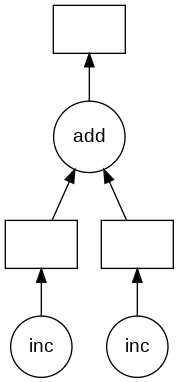

In [ ]:
# Listing 2.6
import dask.delayed as delayed
from dask.diagnostics import ProgressBar

def inc(i):
    return i + 1

def add(x, y):
    return x + y

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

z.visualize()

### Section 2.2.2: Visualizing More Complex DAGs with Loops and Collections

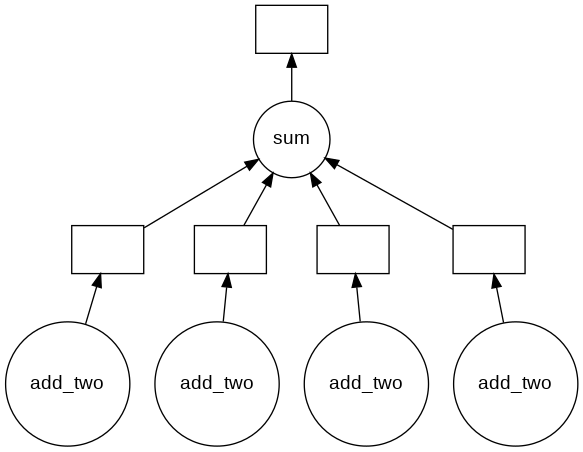

In [ ]:
# Listing 2.7
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

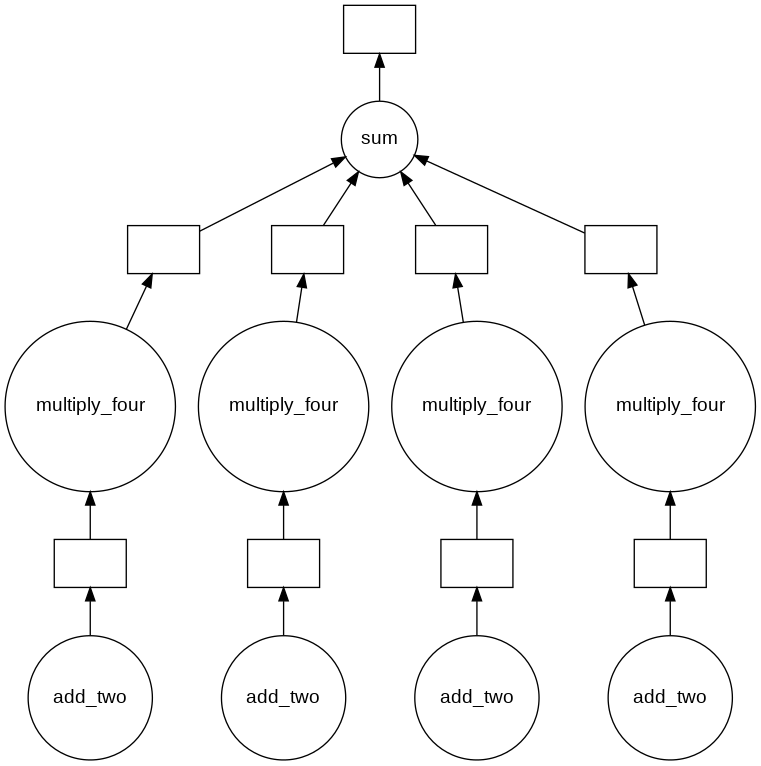

In [ ]:
# Listing 2.8
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

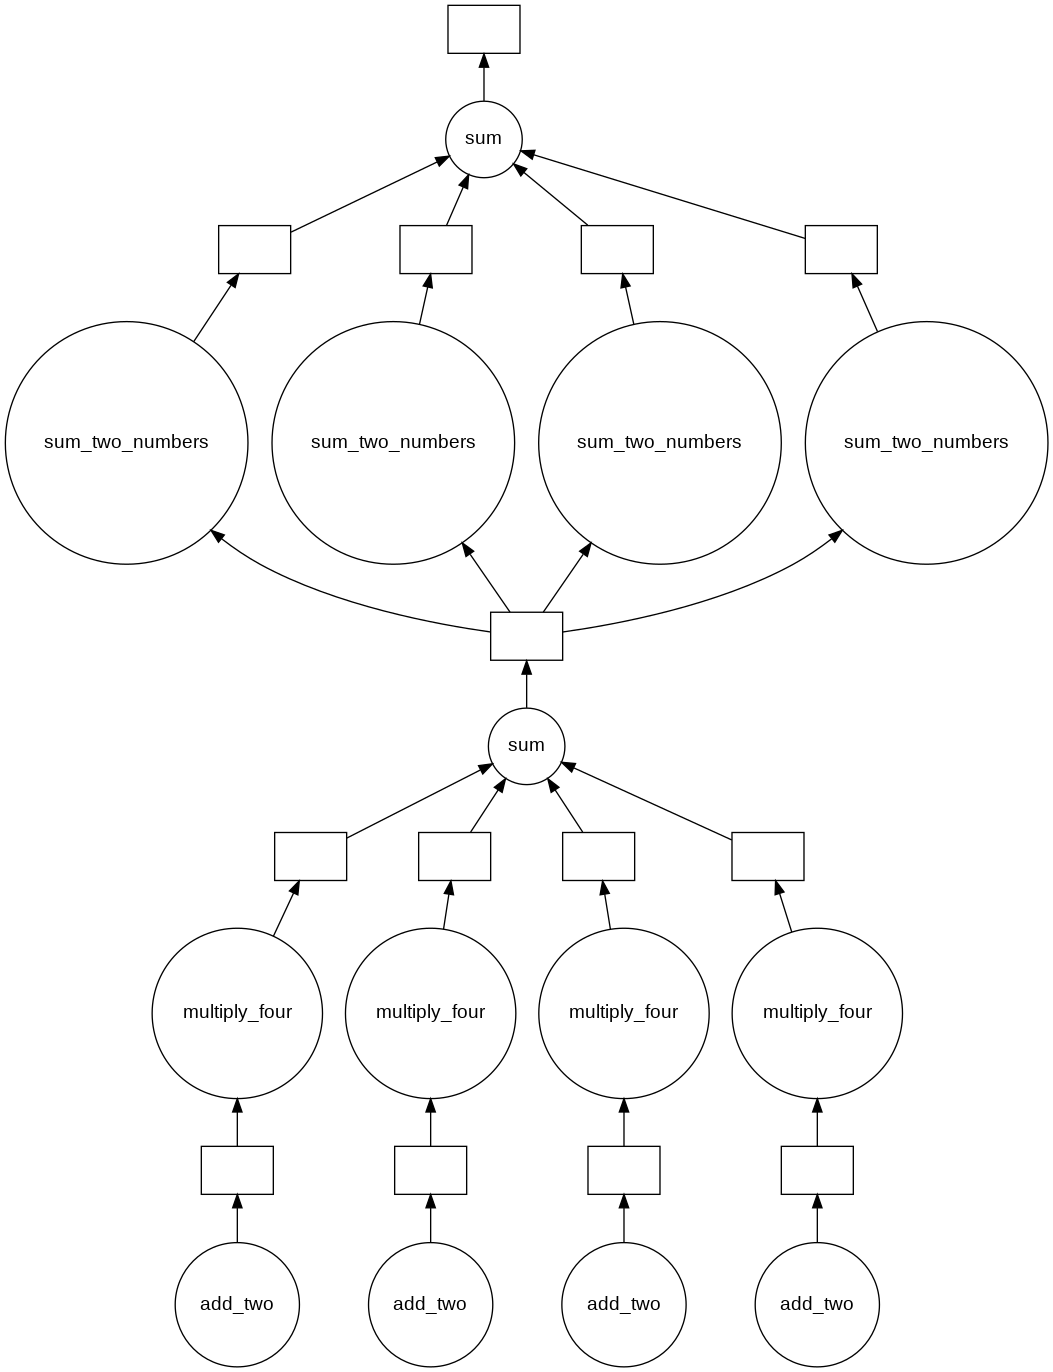

In [ ]:
# Listing 2.9
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

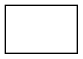

In [ ]:
# Listing 2.10
total_persisted = total.persist()
total_persisted.visualize()

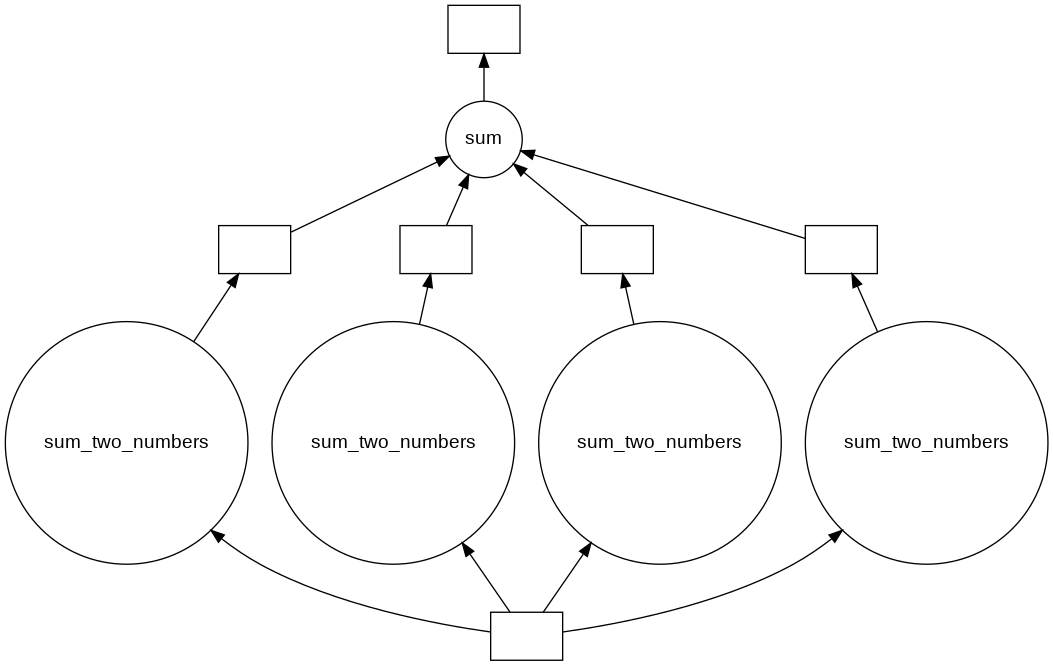

In [ ]:
# Listing 2.11
data2 = [delayed(sum_two_numbers)(l, total_persisted) for l in data]
total2 = delayed(sum)(data2)
total2.visualize()